In [172]:
# !pip install plotly

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!ls data

data.csv          dataD.csv         dataH.csv         genesis.csv
dataA.csv         dataE.csv         dataI.csv         synthetic.csv
dataB.csv         dataF.csv         dataJ.csv         test.csv
dataC.csv         dataG.csv         dataK.csv         test_data_gan.csv


In [4]:
def genesis_train(file):
    data = pd.read_csv(file)
    del data['Unnamed: 32']
    print('Number of datapoints in Training dataset: ',len(data))
    X_train = data.iloc[:, 2:].values
    y_train = data.iloc[:, 1].values
    
    test = pd.read_csv('./data/test.csv')
    del test['Unnamed: 32']
    print('Number of datapoints in Testing dataset: ',len(test))
    X_test = test.iloc[:, 2:].values
    y_test = test.iloc[:, 1].values

    labelencoder = LabelEncoder()
    y_train = labelencoder.fit_transform(y_train)
    y_test = labelencoder.fit_transform(y_test)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model = Sequential()

    model.add(Dense(16, activation='relu', input_dim=30))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=100, epochs=5)

    scores = model.evaluate(X_test, y_test)
    print("Loss: ", scores[0])        #Loss
    print("Accuracy: ", scores[1])    #Accuracy
    print(model.summary())

    #Saving Model
    model.save("./output.h5")
    return scores[1]

In [5]:
def update_train(file):
    data = pd.read_csv(file)
    del data['Unnamed: 32']
    X_train = data.iloc[:, 2:].values
    y_train = data.iloc[:, 1].values
    
    test = pd.read_csv('./data/test.csv')
    del test['Unnamed: 32']
    print('Number of datapoints in Testing dataset: ',len(test))
    X_test = test.iloc[:, 2:].values
    y_test = test.iloc[:, 1].values

    labelencoder = LabelEncoder()
    y_train = labelencoder.fit_transform(y_train)
    y_test = labelencoder.fit_transform(y_test)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model = Sequential()

    model.add(Dense(16, activation='relu', input_dim=30))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    model.load_weights("./output.h5")

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=100, epochs=5)

    scores = model.evaluate(X_test, y_test)
    print("Loss: ", scores[0])        #Loss
    print("Accuracy: ", scores[1])    #Accuracy

    #Saving Model
    model.save("./output.h5")
    return scores[1]

In [6]:
datasetAccuracy = {}
datasetAccuracy['Complete Dataset'] = genesis_train('./data/data.csv')
datasetAccuracy['A'] = genesis_train('./data/dataA.csv')
datasetAccuracy['B'] = genesis_train('./data/dataB.csv')
datasetAccuracy['C'] = genesis_train('./data/dataC.csv')
datasetAccuracy['D'] = genesis_train('./data/dataD.csv')
datasetAccuracy['E'] = genesis_train('./data/dataE.csv')
datasetAccuracy['F'] = genesis_train('./data/dataF.csv')
datasetAccuracy['G'] = genesis_train('./data/dataG.csv')
datasetAccuracy['H'] = genesis_train('./data/dataH.csv')
datasetAccuracy['I'] = genesis_train('./data/dataI.csv')
px.bar(pd.DataFrame.from_dict(datasetAccuracy, orient='index'))

Number of datapoints in Training dataset:  494
Number of datapoints in Testing dataset:  75
Epoch 1/5
5/5 [==============================] - 0s 1ms/step - loss: 0.8842 - accuracy: 0.3279
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.4413
Epoch 3/5
5/5 [==============================] - 0s 1ms/step - loss: 0.7354 - accuracy: 0.5547
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6397
Epoch 5/5
3/3 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.7867
Loss:  0.5922463536262512
Accuracy:  0.7866666913032532
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
___________________________

KeyboardInterrupt: 

Number of datapoints in Testing dataset:  75
Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.5306
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.5306
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.5714
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.5918
Epoch 5/5
3/3 [==============================] - 0s 6ms/step - loss: 0.6441 - accuracy: 0.3600
Loss:  0.6440711617469788
Accuracy:  0.36000001430511475
Number of datapoints in Testing dataset:  75
Epoch 1/5
1/1 [==============================] - 0s 984us/step - loss: 0.6950 - accuracy: 0.4091
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.4848
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.4697
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.3

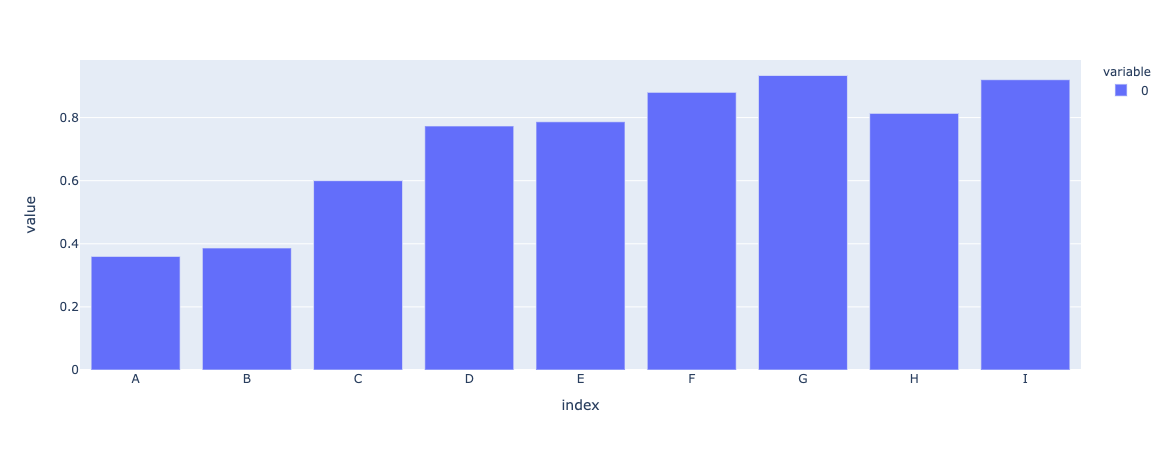

In [374]:
FLAccuracy = {}
FLAccuracy['A'] = update_train('./data/dataA.csv')
FLAccuracy['B'] = update_train('./data/dataB.csv')
FLAccuracy['C'] = update_train('./data/dataC.csv')
FLAccuracy['D'] = update_train('./data/dataD.csv')
FLAccuracy['E'] = update_train('./data/dataE.csv')
FLAccuracy['F'] = update_train('./data/dataF.csv')
FLAccuracy['G'] = update_train('./data/dataG.csv')
FLAccuracy['H'] = update_train('./data/dataH.csv')
FLAccuracy['I'] = update_train('./data/dataI.csv')
px.bar(pd.DataFrame.from_dict(FLAccuracy, orient='index'))

In [335]:
#################################################################################################################

In [375]:
FLAccuracy

{'A': 0.36000001430511475,
 'B': 0.3866666555404663,
 'C': 0.6000000238418579,
 'D': 0.7733333110809326,
 'E': 0.7866666913032532,
 'F': 0.8799999952316284,
 'G': 0.9333333373069763,
 'H': 0.8133333325386047,
 'I': 0.9200000166893005}